# AIPI 590 - XAI | Assignment #06
### Explainable Techniques II
### Yabei Zeng

#### Link to Colab: https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment6/Explainable_Techniques_II.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment6/Explainable_Techniques_II.ipynb)


In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/yabeizeng1121/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt
!pip install alibi --quiet
!pip install pyALE --quiet

# Change working directory to location of notebook
notebook_dir = 'Assignment6'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

## Dataset and Model

For this analysis, I used the **Iris dataset**, which is a classic and widely used dataset available through the `sklearn.datasets` package. The Iris dataset contains 150 samples of iris flowers, with 50 samples from each of the three species: **Setosa**, **Versicolor**, and **Virginica**. Each sample includes four features:

- **Sepal length (cm)**
- **Sepal width (cm)**
- **Petal length (cm)**
- **Petal width (cm)**

The target variable is the species of the flower, which is categorized into three classes: **Setosa**, **Versicolor**, and **Virginica**.

The Iris dataset is well-suited for multiclass classification tasks, where the goal is to classify each sample into one of the three species based on the provided features.

For the model, I chose the **Random Forest Classifier** from the `sklearn.ensemble` module. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the majority vote from the individual trees.

In [ ]:
# Import the packages
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from PyALE import ale
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Ensure y is numeric (0, 1, 2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=5, random_state=873)
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=873)

## Visualization: Correlation Heatmap
Below is a visualization of the correlation heatmap, which is helpful to see how each variables are correlated with each other.

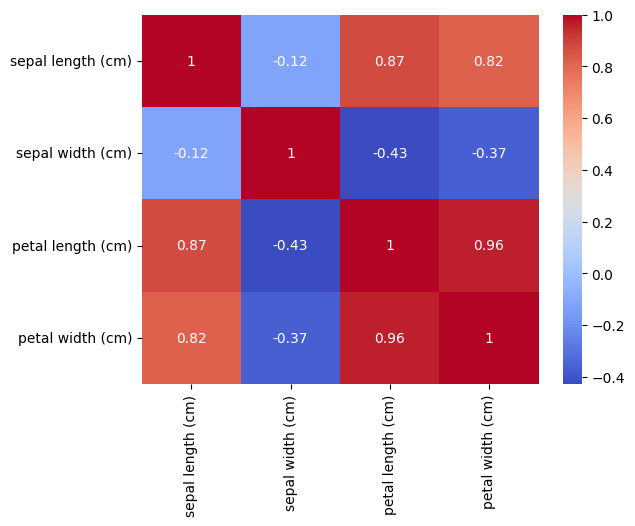

In [ ]:
# Correlation heatmap
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## Correlation Heatmap Analysis

The heatmap above shows the pairwise correlations between the four features of the Iris dataset: **sepal length**, **sepal width**, **petal length**, and **petal width**.

Key observations:
- **Petal length** and **petal width** are highly correlated with a correlation coefficient of **0.96**, indicating a strong positive relationship.
- **Sepal length** also shows a strong positive correlation with both **petal length** (0.87) and **petal width** (0.82), suggesting that flowers with longer sepals tend to have longer and wider petals.
- **Sepal width** has a weak negative correlation with **petal length** (-0.43) and **petal width** (-0.37), indicating that larger sepals may slightly correspond to shorter and narrower petals.

## Visualization: PDP, ICE, and ALE Plots

To interpret the behavior of the Random Forest Classifier, I used **Partial Dependence Plots (PDP)**, **Individual Conditional Expectation (ICE) plots**, and **Accumulated Local Effects (ALE) plots**.

- **PDP** provides an averaged view of how a feature affects the model’s predictions by showing the overall trend across the dataset, holding other features constant.
- **ICE** plots go a step further by showing the effect of a feature on the prediction for individual data points, helping to capture heterogeneous patterns that may be hidden in the global PDP.
- **ALE** plots are more accurate in the presence of correlated features, as they capture the local effects of a feature on the model’s predictions by averaging over small intervals of the feature space.

These visualizations help to better understand how individual features influence the model’s predictions in both global and local contexts.


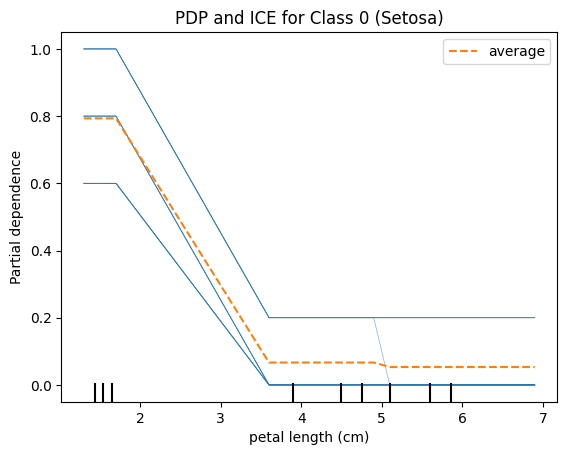

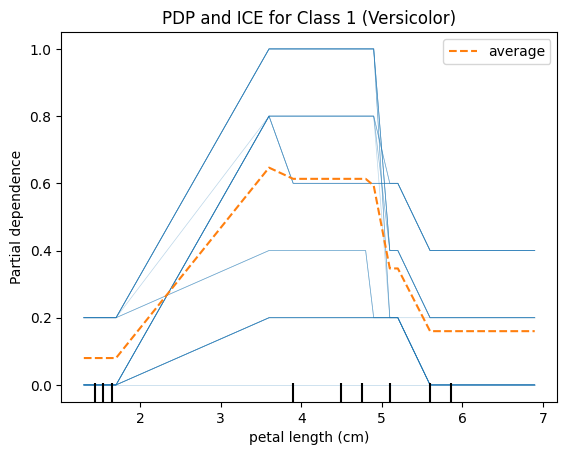

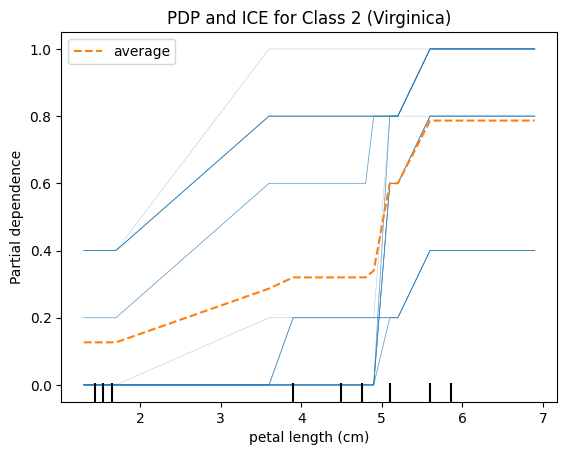

INFO:PyALE._ALE_generic:Continuous feature detected.


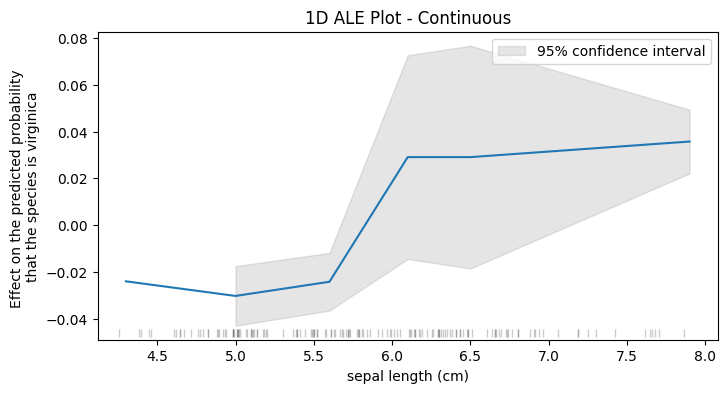

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from alibi.explainers import ALE
from PyALE import ale

# PDP and ICE plots
# Create PDP and ICE plots for the 'petal length (cm)' feature and each target class
features = ['petal length (cm)']

# PDP and ICE for class 0 (setosa)
PartialDependenceDisplay.from_estimator(clf, X_test, features, kind="both", target=0)
plt.title('PDP and ICE for Class 0 (Setosa)')
plt.show()

# PDP and ICE for class 1 (versicolor)
PartialDependenceDisplay.from_estimator(clf, X_test, features, kind="both", target=1)
plt.title('PDP and ICE for Class 1 (Versicolor)')
plt.show()

# PDP and ICE for class 2 (virginica)
PartialDependenceDisplay.from_estimator(clf, X_test, features, kind="both", target=2)
plt.title('PDP and ICE for Class 2 (Virginica)')
plt.show()


# ALE plot visualization
# Generate ALE for a continuous feature, e.g., 'MedInc' (median income)
class clf_dummy():
    def predict(df):
        return(clf.predict_proba(df)[:, 2])

feat_eff = ale(X=X, model=clf_dummy, feature=['sepal length (cm)'], grid_size=5)
plt.ylabel('Effect on the predicted probability \nthat the species is virginica')
plt.show()


## Analysis of PDP, ICE, and ALE Plots

### PDP and ICE Plots

1. **Class 0 (Setosa)**:
   - The **PDP** shows that for **Class 0 (Setosa)**, the model assigns a high probability when the petal length is between 1-3 cm. As petal length increases beyond 3 cm, the probability of predicting Setosa decreases sharply.
   - The **ICE** lines demonstrate that this trend is consistent across individual data points, with most following the same pattern of declining probability as petal length increases.

2. **Class 1 (Versicolor)**:
   - The **PDP** shows the highest probability of predicting **Class 1 (Versicolor)** when petal length is between 3-5 cm. Beyond this range, the likelihood of classifying a flower as Versicolor decreases.
   - The **ICE** lines reveal variation among individual data points, indicating some heterogeneous behavior, especially at longer petal lengths, suggesting the influence of other features.

3. **Class 2 (Virginica)**:
   - The **PDP** shows that for **Class 2 (Virginica)**, the probability of being classified as Virginica increases as petal length surpasses 5 cm.
   - The **ICE** lines illustrate variability among individual samples, with many following the general trend but at different points, highlighting the role of feature interactions.

### ALE Plot

4. **ALE Plot for Sepal Length**:
   - The **ALE plot** shows that shorter sepal lengths (below 5 cm) slightly reduce the probability of the flower being classified as **Virginica**. However, as sepal length increases beyond 5.5 cm, the probability increases sharply, peaking around 6 cm. This reflects the typical characteristics of Virginica flowers, which generally have larger sepals.


### Differences Between PDP and ALE Plots

The **PDP** and **ALE** plots both aim to interpret the influence of individual features on model predictions, but they differ in how they handle feature interactions and correlations.

1. **Global vs. Local Interpretation**:
   - The **PDP** provides a global, averaged effect of a feature on the prediction across all samples, assuming that the feature being analyzed is independent of other features. This can be misleading when features are correlated, as seen in the **PDP for petal length**, where a simple global trend is shown without accounting for interactions with other features.
   - The **ALE plot**, on the other hand, captures local effects of a feature by averaging over small intervals. The **ALE for sepal length** reflects the localized impact of the feature on the prediction probability for **Class 2 (Virginica)**, adjusting for interactions with other features and making the interpretation more accurate in the presence of correlated features.

2. **Handling Feature Correlations**:
   - **PDP** assumes independence between features, so it may show misleading trends if features are correlated. In contrast, the **ALE plot** accounts for correlations between features by isolating the effects within smaller intervals of the feature space, providing a more reliable interpretation.

3. **Interpretation of Results**:
   - The **PDP for petal length** shows a more straightforward and averaged view of how increasing petal length affects the probability of classification across all classes.
   - The **ALE plot for sepal length**, however, offers a nuanced view, showing how the influence of sepal length changes at different ranges, particularly highlighting a sharp increase in the probability of **Virginica** classification around 6 cm, which is less obvious in a global analysis like PDP.

In summary, while both plots are valuable for interpretation, the **ALE plot** provides a more accurate and localized understanding of the feature's impact on predictions, especially when features are correlated or when interactions between features are significant.
